<center><h1> Case Study 5</h1></center>
<center><h3> Week 5 (out of 5)</h3></center>

**Author(s):**
1. Robin Fu (robin.fu@emory.edu)
 
**Data Source**: W.C. Hunter and M.B. Walker (1996), [“*The Cultural Affinity Hypothesis and Mortgage Lending Decisions*,”](https://link.springer.com/article/10.1007/BF00174551) Journal of Real Estate Finance and Economics 13, 57-70.
 
**Book**: [Introductory Econometrics: A Modern Approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) by Jeffrey Wooldridge

**Data Description**: ```http://fmwww.bc.edu/ec-p/data/wooldridge/loanapp.dta```

```
  Obs:  1989

  1. occ                       occupancy
  2. loanamt                   loan amt in thousands
  3. action                    type of action taken
  4. msa                       msa number of property
  5. suffolk                   =1 if property in Suffolk County
  6. race                      race of applicant
  7. gender                    gender of applicant
  8. appinc                    applicant income, $1000s
  9. typur                     type of purchaser of loan
 10. unit                      number of units in property
 11. married                   =1 if applicant married
 12. dep                       number of dependents
 13. emp                       years employed in line of work
 14. yjob                      years at this job
 15. self                      self-employment dummy
 16. atotinc                   total monthly income
 17. cototinc                  coapp total monthly income
 18. hexp                      propose housing expense
 19. price                     purchase price
 20. other                     other financing, $1000s
 21. liq                       liquid assets
 22. rep                       no. of credit reports
 23. gdlin                     credit history meets guidelines
 24. lines                     no. of credit lines on reports
 25. mortg                     credit history on mortgage paym
 26. cons                      credit history on consumer stuf
 27. pubrec                    =1 if filed bankruptcy
 28. hrat                      housing exp, % total inccome
 29. obrat                     other oblgs,  % total income
 30. fixadj                    fixed or adjustable rate?
 31. term                      term of loan in months
 32. apr                       appraised value
 33. prop                      type of property
 34. inss                      PMI sought
 35. inson                     PMI approved
 36. gift                      gift as down payment
 37. cosign                    is there a cosigner
 38. unver                     unverifiable info
 39. review                    number of times reviewed
 40. netw                      net worth
 41. unem                      unemployment rate by industry
 42. min30                     =1 if minority pop. > 30%
 43. bd                        =1 if boarded-up val > MSA med
 44. mi                        =1 if tract inc > MSA median
 45. old                       =1 if applic age > MSA median
 46. vr                        =1 if tract vac rte > MSA med
 47. sch                       =1 if > 12 years schooling
 48. black                     =1 if applicant black
 49. hispan                    =1 if applicant Hispanic
 50. male                      =1 if applicant male
 51. reject                    =1 if action == 3
 52. approve                   =1 if action == 1 or 2
 53. mortno                    no mortgage history
 54. mortperf                  no late mort. payments
 55. mortlat1                  one or two late payments
 56. mortlat2                  > 2 late payments
 57. chist                     =0 if accnts deliq. >= 60 days
 58. multi                     =1 if two or more units
 59. loanprc                   amt/price
 60. thick                     =1 if rep > 2
 61. white                     =1 if applicant white
 62. obwhte                    obrat*awhite
 ```

1. You are interested in building a model that accurately predict loan rejection (`rejection`) based on various applicants' features such as `loanamt`, `appinc`, `unit`, `married`, `dep`, `emp`, `yjob`, `self`, `atotinc`, `cototinc`, `hexp`, `price`, `other`, `liq`, `rep`, `gdlin`, `lines`, `mortg`, `cons`, `pubrec`, `hrat`, `obrat`, `fixadj`, `term`, `apr`, `gift`, `cosign`, `netw`, `uem`, `min30`, `bd`, `mi`, `old`, `vr`, `sch`, `mortno`, `chist`, `multi`, `loanprc`, `thick`, and the `race`, and `gender` characteristics.
    1. [10 points] For _all_ the proposed features measured in USD that contain __negative__ values, proceed to replace these negative values with zeroes. Leave the _original_ zeroes in them as such.
    2. [10 points] Build a single _decision tree_ based on these features using a [random_state](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) equal to 42, using 75% of the original data set as your train set (use 42 again as your random seed).
    3. [10 points] Which [criterion](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) produce a better score?

In [1]:
#Importing packages
import pandas as pd
import numpy as np

#Loading data and dropping NaNs
data = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/loanapp.dta')

#Assigning to first dataframe
df1 = data[['reject','loanamt','appinc','unit','married','dep','emp','yjob','self','atotinc','cototinc','hexp','price','other',
          'liq','rep','gdlin','lines','mortg','cons','pubrec','hrat','obrat','fixadj','term','apr','gift','cosign','netw','unem',
          'min30','bd','mi','old','vr','sch','mortno','chist','multi','loanprc','thick','race','gender']]
df1 = df1.loc[:].dropna() #added .loc to avoid a warning message

##Replace proposed USD features with zeroes if negative
usd = ['loanamt','appinc','atotinc','cototinc','hexp','price','other','liq','netw','apr']
df1[usd] = df1[usd].where(df1 >= 0, 0)

#Counting negative values in USD features to check
print(df1[usd].lt(0).sum())

loanamt     0
appinc      0
atotinc     0
cototinc    0
hexp        0
price       0
other       0
liq         0
netw        0
apr         0
dtype: int64


In [2]:
#Creating target and inputs
from sklearn import tree
from sklearn.model_selection import train_test_split

X1 = df1.drop('reject', axis = 1)
y1 = df1['reject']

#Splitting train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

In [3]:
#Score based on gini criterion
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 42)
model.fit(X1_train,y1_train)

#Score the model
model.score(X1_test,y1_test)

0.8953229398663697

In [4]:
#Score based on entropy criterion
model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model.fit(X1_train,y1_train)

#Score the model
model.score(X1_test,y1_test)

0.8685968819599109

Based on the scores above, we see that the Gini criterion produces a better score for our model.

2. [20 points] Now perform the same analysis as in question 1 above _but_ use the `action` variable as your outcome variable, and produce a color graph of the confusion matrix based on your test data set as shown in the instructional video using the [criterion](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) that produced the best score.

In [5]:
from sklearn.metrics import confusion_matrix

#Reloading data frame
df2 = data[['action','loanamt','appinc','unit','married','dep','emp','yjob','self','atotinc','cototinc','hexp','price','other',
          'liq','rep','gdlin','lines','mortg','cons','pubrec','hrat','obrat','fixadj','term','apr','gift','cosign','netw','unem',
          'min30','bd','mi','old','vr','sch','mortno','chist','multi','loanprc','thick','race','gender']]
df2 = df2.loc[:].dropna() #added .loc to avoid a warning message

#Replace proposed USD features with zeroes if negative
usd = ['loanamt','appinc','atotinc','cototinc','hexp','price','other','liq','netw','apr']
df2[usd] = df2[usd].where(df2 >= 0, 0)

X2 = df2.drop('action', axis = 1)
y2 = df2['action']

#Splitting train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 42)

In [6]:
#Score based on gini criterion
modelg = tree.DecisionTreeClassifier(criterion = 'gini', random_state=42)
modelg.fit(X2_train, y2_train)
modelg.score(X2_test,y2_test)

0.8307349665924276

In [7]:
#Score based on entropy criterion
modele = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=42)
modele.fit(X2_train, y2_train)
modele.score(X2_test,y2_test)

0.8240534521158129

Given these scores, we will use the gini criterion below for the confusion matrix.

Text(69.0, 0.5, 'True Values')

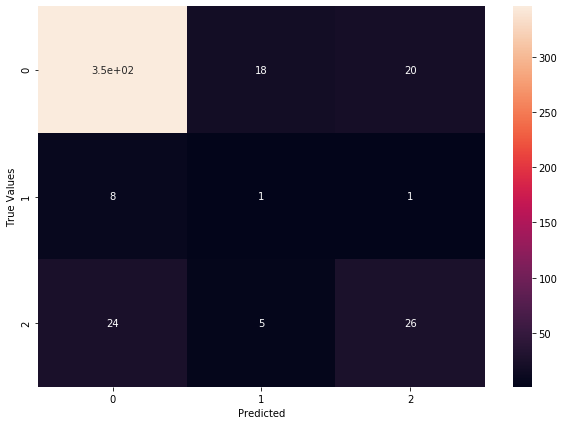

In [8]:
#Confusion matrix plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

#Creating confusion matrix
y2_predicted = modelg.predict(X2_test)
cm = confusion_matrix(y2_test, y2_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Values')

3. [30 points] Now redo your answers to questions 1 and 2 (using the `gini` criterion) above but implementing a Random Forest (with options `n_estimators=50` and `random_state=42`). __Note__: Please read the relevant [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) if you were to find numerical issues.

Both gini and entropy criteria are used for the parts below for completeness. This is also done as the entropy score for Question 2 ends up being higher than the gini score and is shown as such.

#### Question 1 Redo:

In [9]:
from sklearn.ensemble import RandomForestClassifier
#Observing the gini criterion
model = RandomForestClassifier(n_estimators = 50, random_state = 42, criterion = 'gini')
model.fit(X1_train, y1_train)
print('Gini Score:',model.score(X1_test, y1_test))

Gini Score: 0.9287305122494433


In [10]:
#Observing the entropy criterion
model = RandomForestClassifier(n_estimators = 50, random_state = 42, criterion = 'entropy')
model.fit(X1_train, y1_train)
print('Entropy Score:',model.score(X1_test, y1_test))

Entropy Score: 0.9354120267260579


By above, we now see that, given our parameters, the Entropy criterion produces a higher score compared to the Gini criterion and thus is preferred.

#### Question 2 Redo:

Gini Score: 0.9086859688195991


Text(69.0, 0.5, 'True Values')

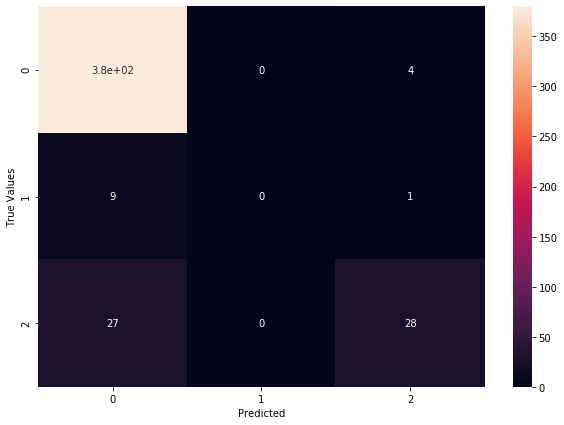

In [11]:
#Observing the gini criterion
model = RandomForestClassifier(n_estimators = 50, random_state = 42, criterion = 'gini')
model.fit(X2_train, y2_train)
print('Gini Score:',model.score(X2_test, y2_test))

y2_predicted = model.predict(X2_test)
cm = confusion_matrix(y2_test, y2_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Values')

Entropy Score: 0.9131403118040089


Text(69.0, 0.5, 'True Values')

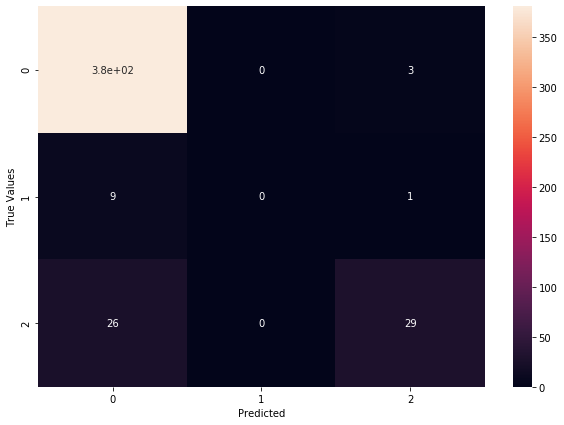

In [12]:
#Observing the entropy criterion
model = RandomForestClassifier(n_estimators = 50, random_state = 42, criterion = 'entropy')
model.fit(X2_train, y2_train)
print('Entropy Score:',model.score(X2_test, y2_test))

y2_predicted = model.predict(X2_test)
cm = confusion_matrix(y2_test, y2_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True Values')

4. [20 points] After reading this [post](https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c) and watching this [video](https://www.youtube.com/watch?v=SMGEmCOUBUw), proceed to plot the resulting graphs for the 5th, 23rd, and 47th estimators in your random forest implementation in question 3 above when you use the `rejection` decision as your outcome variable.

For consistency with question 3's instructions, the Gini criterion will be used.

In [13]:
#Loading data and necessary packages
from sklearn.tree import export_graphviz
from pydotplus.graphviz import graph_from_dot_data
from IPython.display import Image

model = RandomForestClassifier(n_estimators = 50, random_state = 42, criterion = 'gini')
model.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Alternative to methods described in video and article as those were producing errors with file created. This function effectively uses the same processes while bypassing the file-saving step. 

In [14]:
def tree_graph(estimator):
    dot = export_graphviz(estimator, out_file=None, 
                feature_names = X1.columns,
                class_names = 'rejection',
                rounded = True, proportion = False, 
                precision = 2, filled = True)
    graph = graph_from_dot_data(dot)
    return Image(graph.create_png())

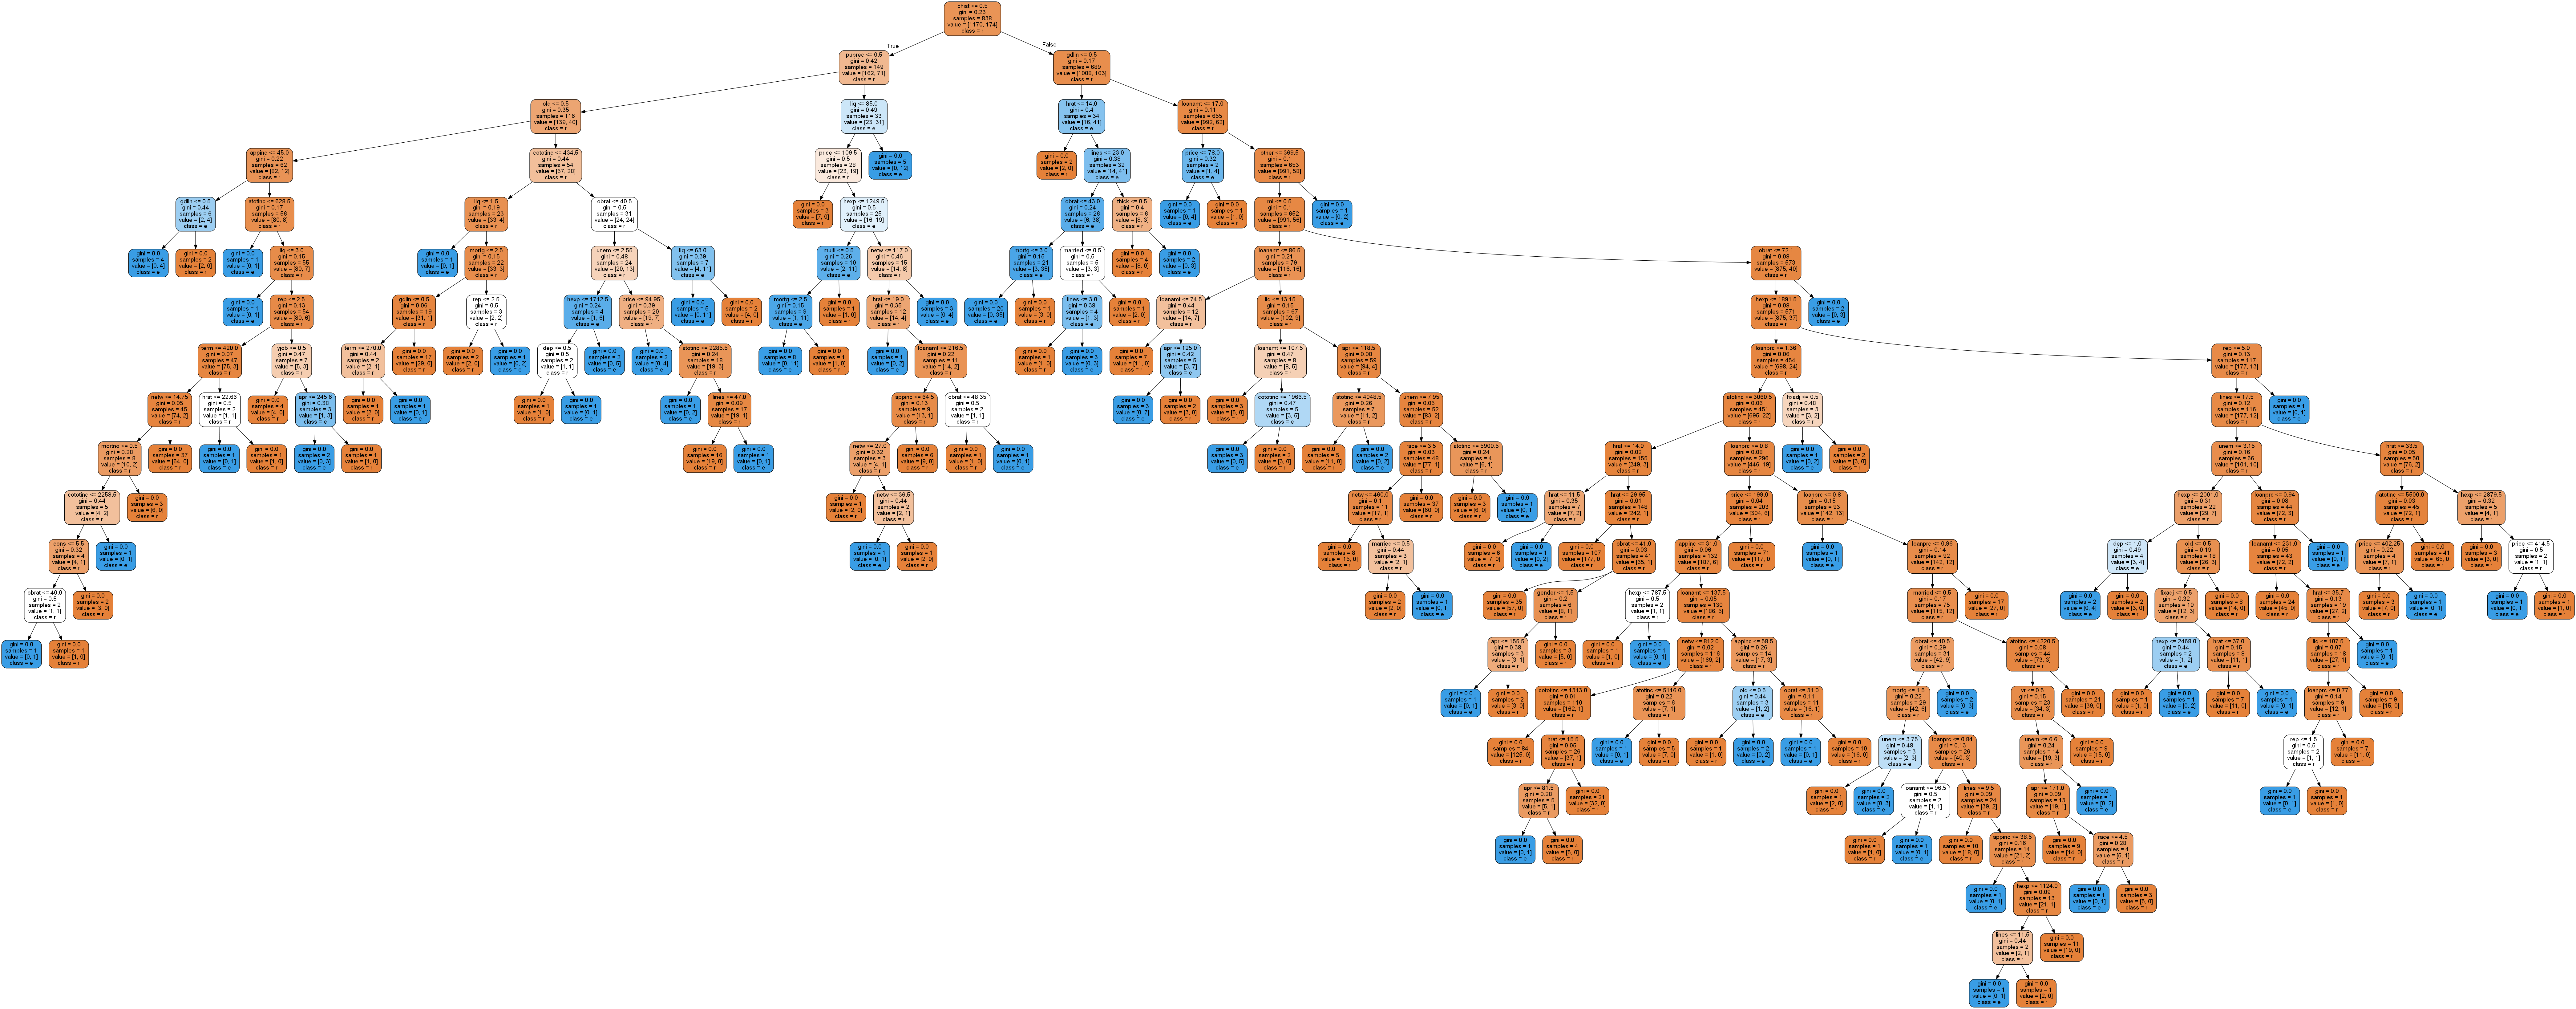

In [15]:
tree_graph(model.estimators_[4]) #5th Estimator

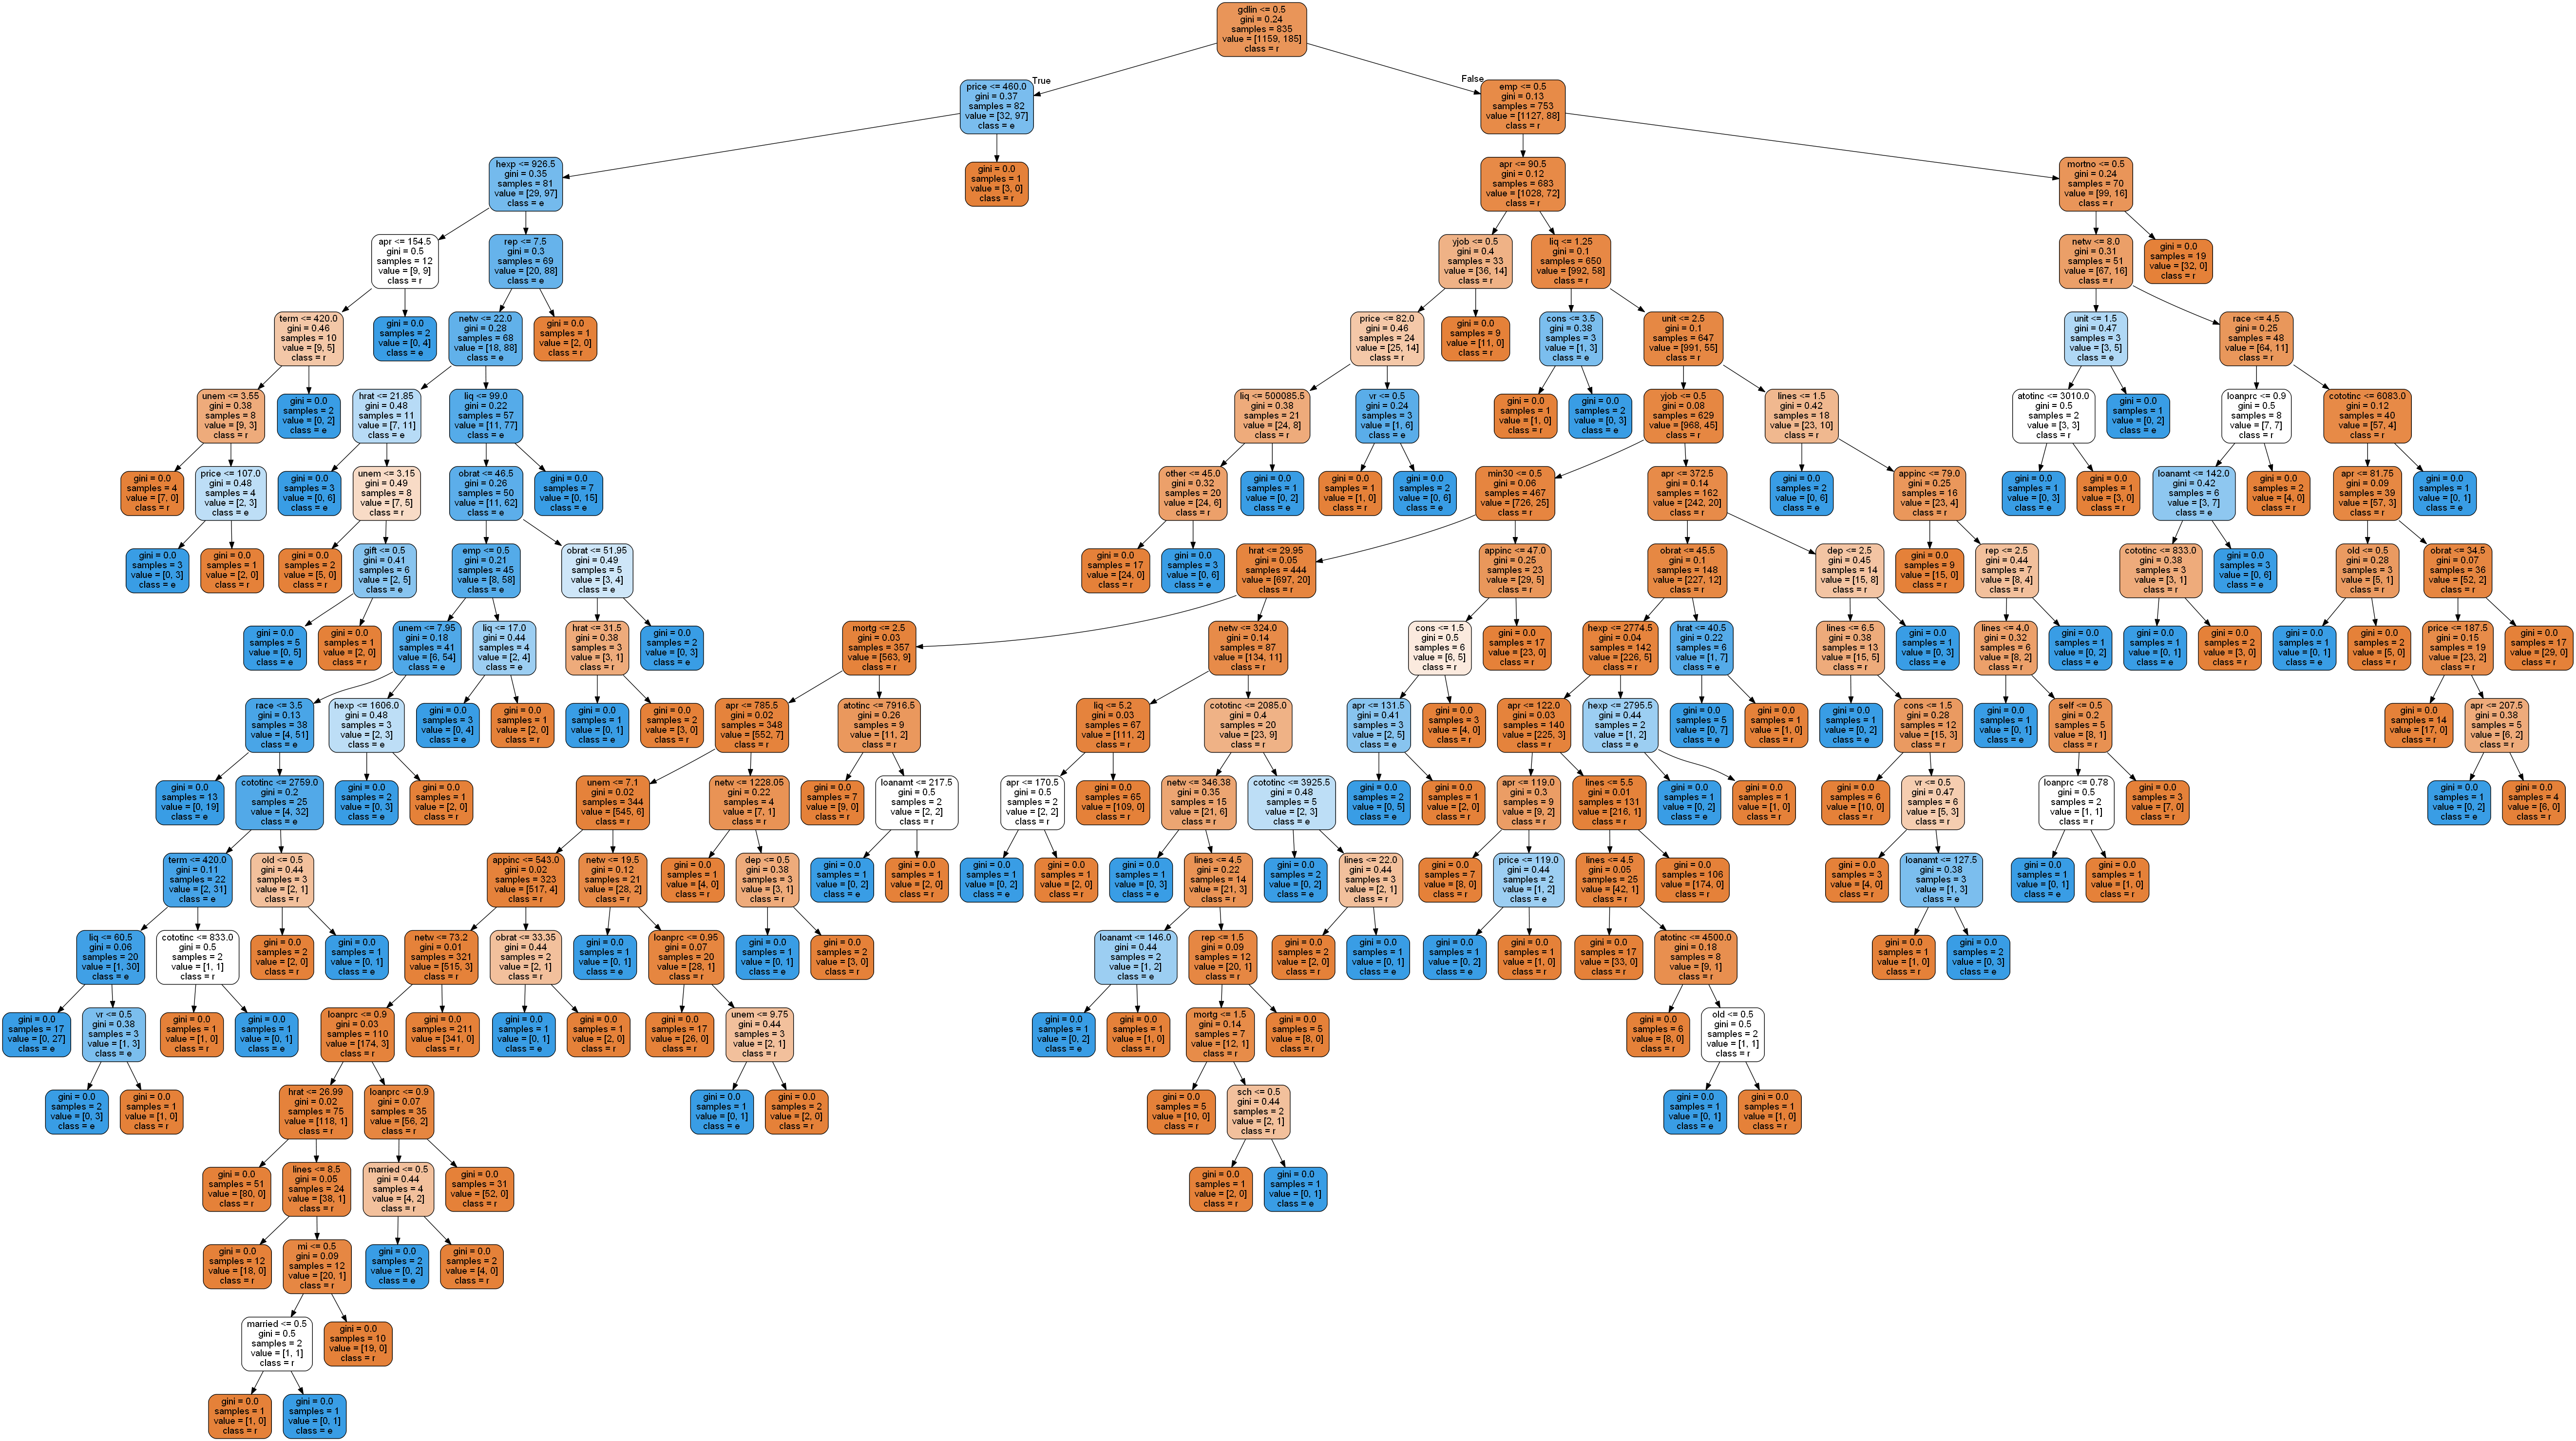

In [16]:
tree_graph(model.estimators_[22]) #23rd Estimator

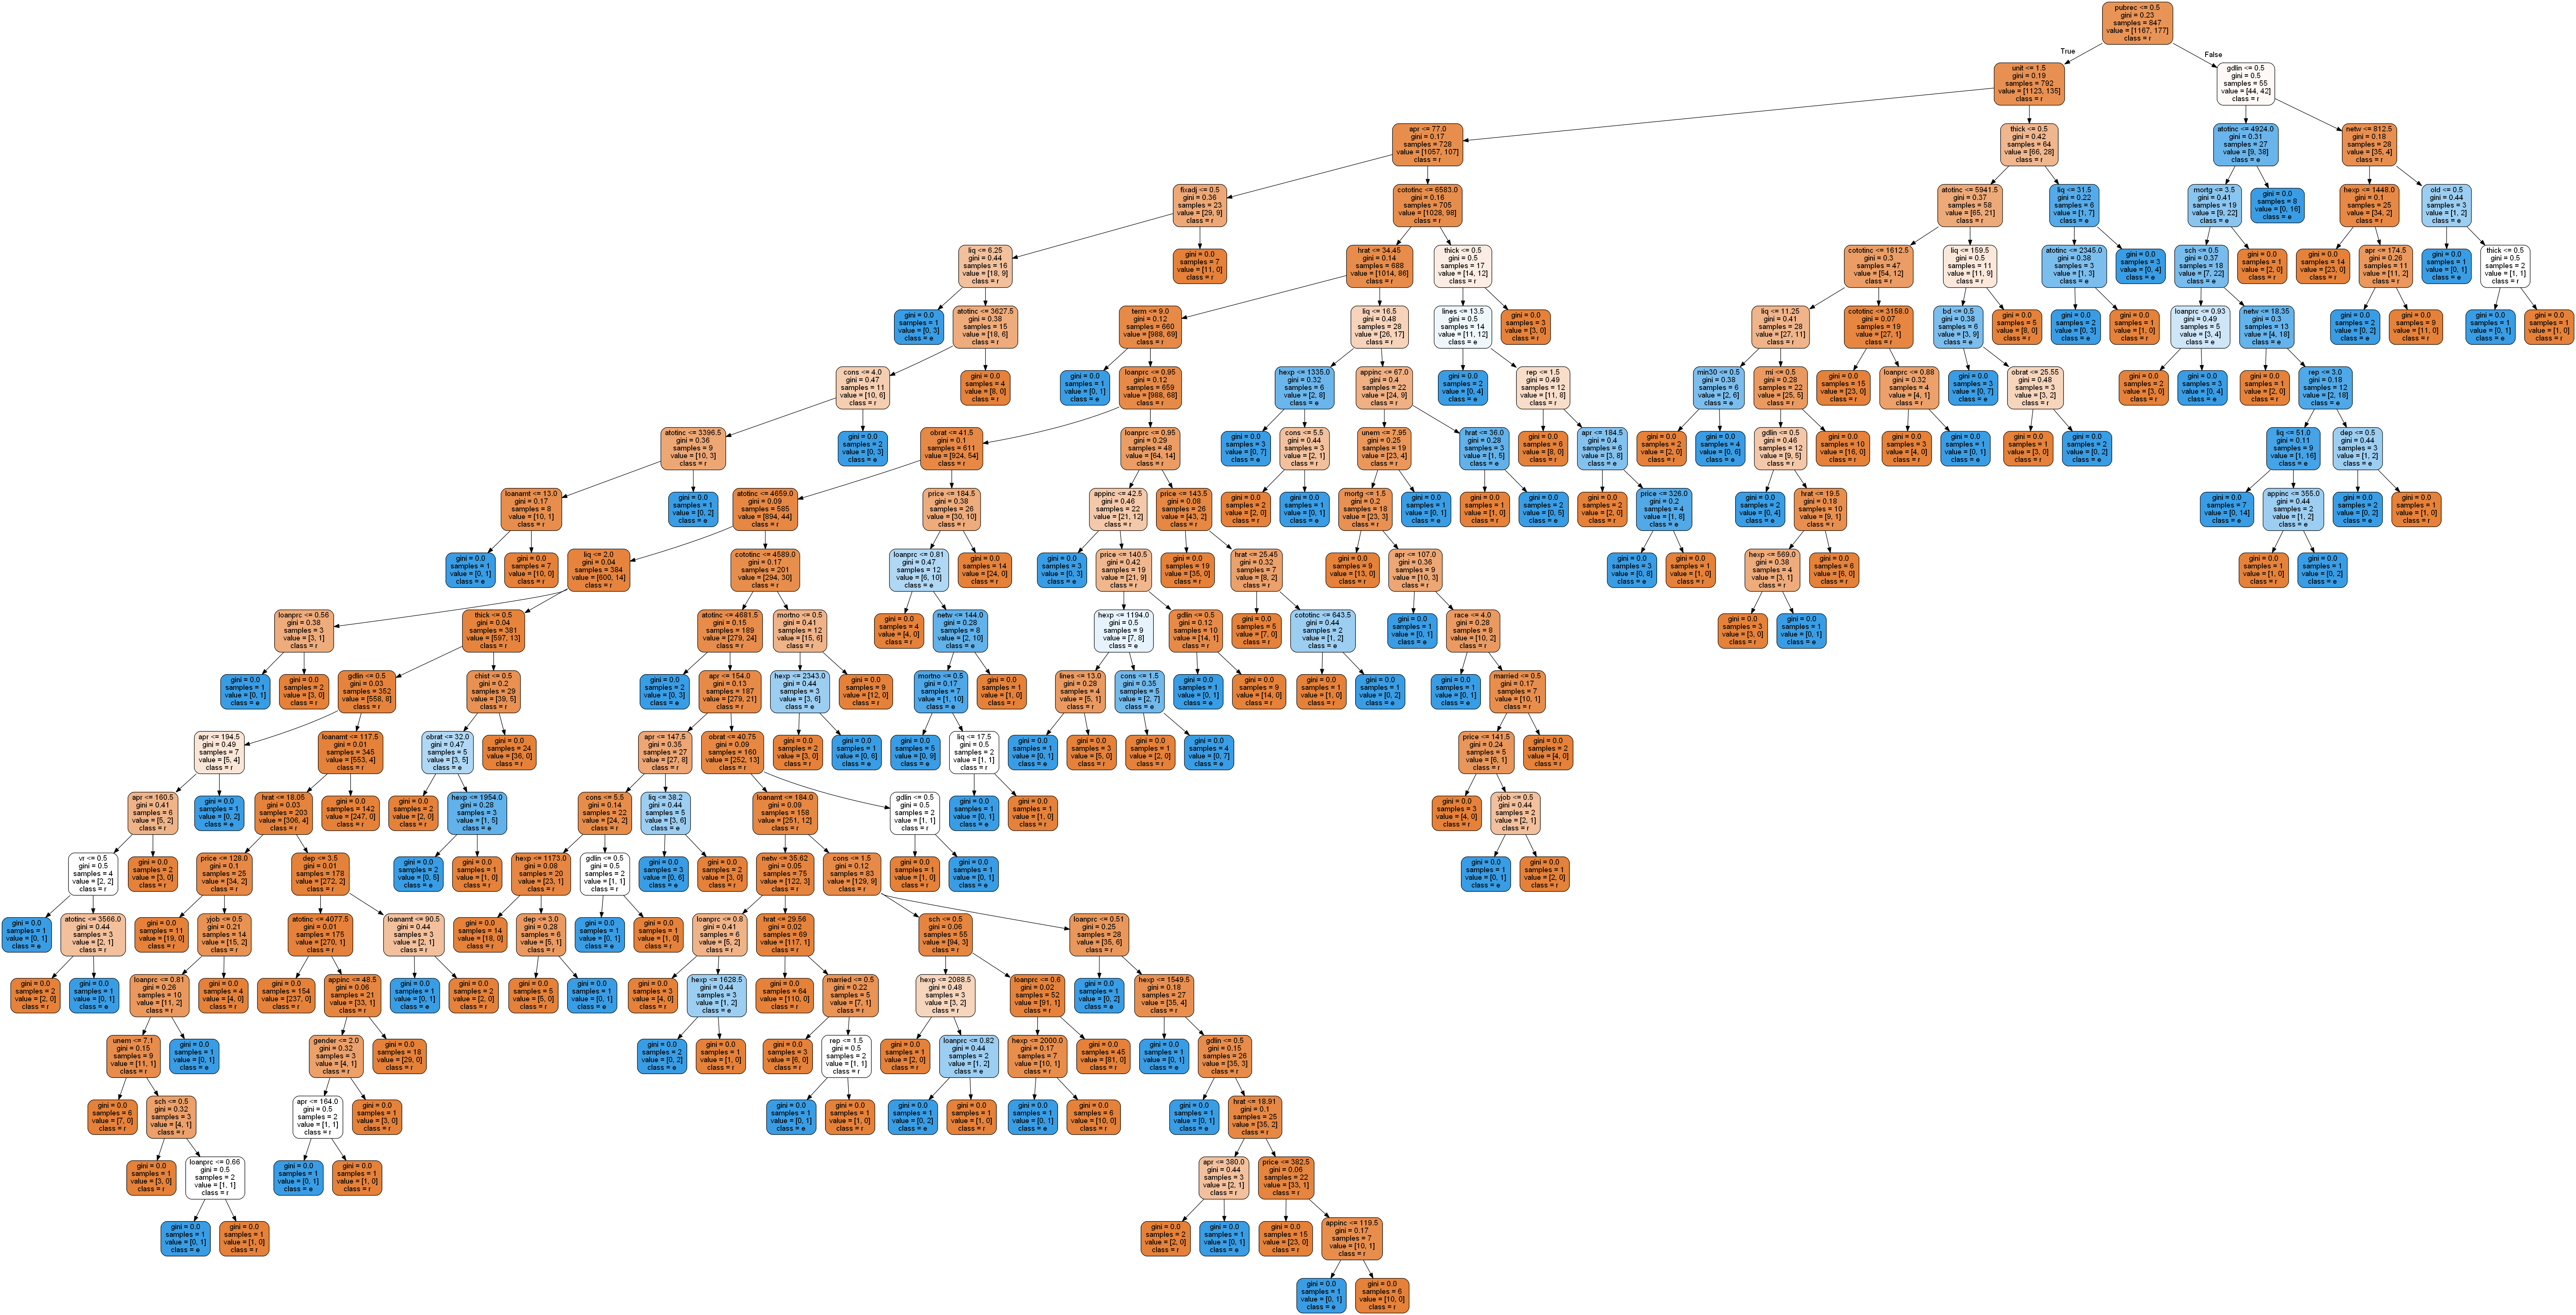

In [17]:
tree_graph(model.estimators_[46]) #47th Estimator